In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("C:/Users/HP/Desktop/Insurance cross sell.csv")

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [ ]:
df['Vehicle_Age'] = df['Vehicle_Age'].replace(['> 2 Years'],'1')

In [ ]:
df['Vehicle_Age'] = df['Vehicle_Age'].replace(['1-2 Year'],'0')

In [ ]:
df['Vehicle_Age'] = df['Vehicle_Age'].replace(['< 1 Year'],'-1')

In [ ]:
df['Vehicle_Age'] = df['Vehicle_Age'].astype(float)

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,1.0,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,0.0,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,1.0,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,-1.0,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,-1.0,No,27496.0,152.0,39,0


In [ ]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace(['Yes'],'1')

In [ ]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace(['No'],'0')

In [ ]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].astype(float)


In [ ]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age             float64
Vehicle_Damage          float64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,1.0,1.0,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,0.0,0.0,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,1.0,1.0,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,-1.0,0.0,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,-1.0,0.0,27496.0,152.0,39,0


In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,-0.390384,0.504877,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,0.567439,0.499977,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,-1.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,0.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,0.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,1.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.shape

(381109, 12)

In [ ]:
df.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.000878,-0.001507,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.765790,0.267534,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.037306,-0.016622,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,0.043778,0.028235,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,-0.380873,-0.824143,0.004269,0.219381,0.002537,-0.341170
Vehicle_Age,0.000878,0.765790,-0.037306,0.043778,-0.380873,1.000000,0.396873,0.041580,-0.550663,-0.001892,0.221874
Vehicle_Damage,-0.001507,0.267534,-0.016622,0.028235,-0.824143,0.396873,1.000000,0.009349,-0.224377,-0.002064,0.354400
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,0.041580,0.009349,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.550663,-0.224377,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.001892,-0.002064,-0.000608,0.000002,1.000000,-0.001050


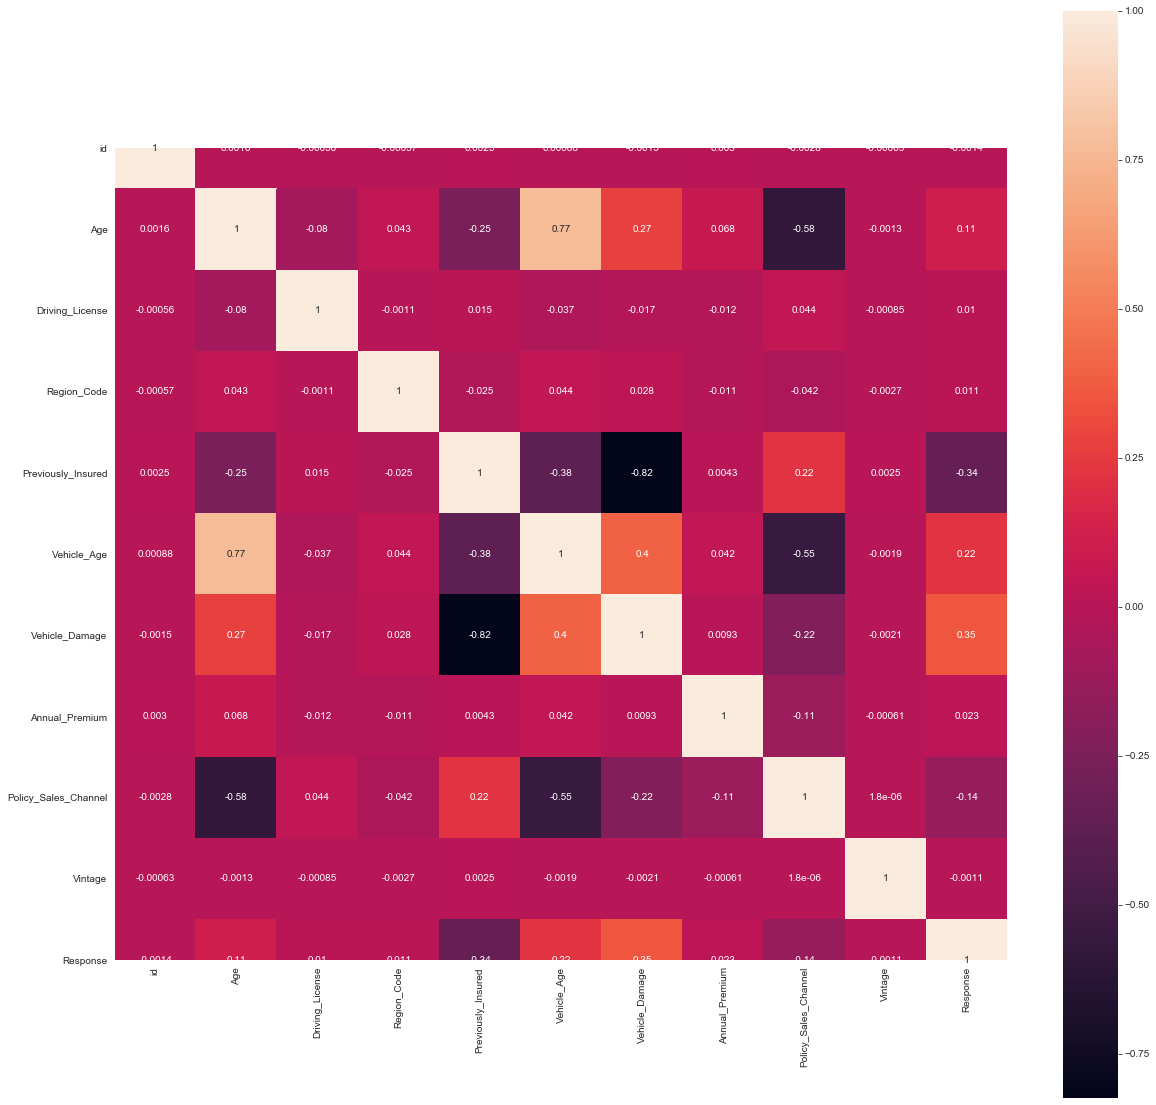

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), square=True, annot=True)

In [ ]:
df1=df.drop(['id','Driving_License','Region_Code','Annual_Premium','Vintage','Gender'],axis = 1)
df1.dropna()
df1.head()


,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
0,44,0,1.0,1.0,26.0,1
1,76,0,0.0,0.0,26.0,0
2,47,0,1.0,1.0,26.0,1
3,21,1,-1.0,0.0,152.0,0
4,29,1,-1.0,0.0,152.0,0


0    334399
1     46710
Name: Response, dtype: int64


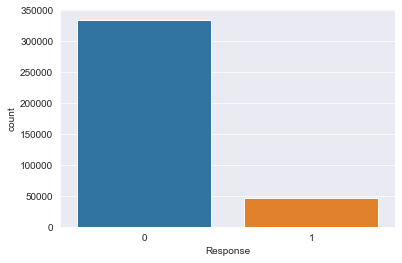

In [ ]:
ax = sns.countplot(x='Response', data=df)
print(df['Response'].value_counts())

# Under Sampling

In [ ]:
minority_class_len = len(df1[df1['Response'] == 1])
print(minority_class_len)

46710


In [ ]:
majority_class_indices = df1[df1['Response'] == 0].index
print(majority_class_indices)

Int64Index([     1,      3,      4,      5,      6,      8,      9,     11,
                12,     13,
            ...
            381099, 381100, 381101, 381102, 381103, 381104, 381105, 381106,
            381107, 381108],
           dtype='int64', length=334399)


In [ ]:
random_majority_indices = np.random.choice(majority_class_indices,minority_class_len, replace=False)
print(len(random_majority_indices))

46710


In [ ]:
minority_class_indices = df1[df1['Response'] == 1].index
print(minority_class_indices)

Int64Index([     0,      2,      7,     10,     15,     19,     26,     29,
                57,     69,
            ...
            380987, 380997, 381026, 381029, 381031, 381057, 381061, 381073,
            381075, 381097],
           dtype='int64', length=46710)


In [ ]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])

In [ ]:
under_sample = df1.loc[under_sample_indices]

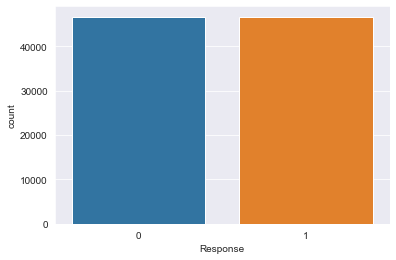

In [ ]:
sns.countplot(x='Response', data=under_sample)

In [ ]:
y = under_sample['Response']

X = under_sample.drop(['Response'],axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [ ]:
X.shape

(93420, 5)

In [ ]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [ ]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [ ]:
cv = RepeatedKFold(n_splits = 5, n_repeats = 1, random_state = 1)

**Logistic Regression**



In [ ]:
from sklearn.linear_model import LogisticRegression 
Lr_model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator= Lr_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.783665 using {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
Lr = LogisticRegression(C = 0.01,penalty = 'l2',solver = 'lbfgs')
Lr.fit(X_train,y_train)

LogisticRegression(C=0.01)

In [ ]:
y_pred_Lr = Lr.predict(X_test) 

In [ ]:
cm_Lr = confusion_matrix(y_test, y_pred_Lr) 
  
print ("Confusion Matrix : \n", cm_Lr)

Confusion Matrix : 
 [[ 8240  5773]
 [  339 13674]]


In [ ]:
generate_model_report(y_test, y_pred_Lr)

Accuracy =  0.7819167915507029
Precision =  0.7031418727824343
Recall =  0.9758081781203168
F1 Score =  0.8173341303048416


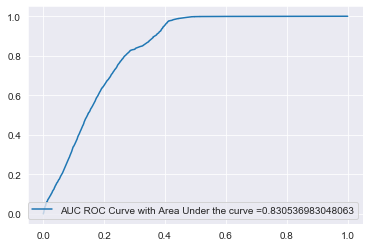

In [ ]:
generate_auc_roc_curve(Lr, X_test)

**Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']

grid = dict(n_neighbors=n_neighbors,weights=weights)

grid_search = GridSearchCV(estimator= knn_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17, weights = 'distance')
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn) 
  
print ("Confusion Matrix : \n", cm_knn)

Confusion Matrix : 
 [[ 9846  4167]
 [ 2019 11994]]


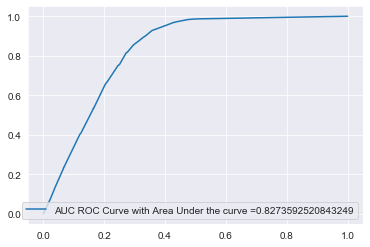

In [ ]:
generate_auc_roc_curve(knn, X_test)

In [ ]:
generate_model_report(y_test, y_pred_knn)

Accuracy =  0.7792763862128024
Precision =  0.7421570447373306
Recall =  0.8559195033183472
F1 Score =  0.7949890634320939


**Decision Tree**


In [ ]:
from sklearn.ensemble import BaggingClassifier
DT_model = BaggingClassifier()
n_estimators = [10,50, 100,250,500,750, 1000]

grid = dict(n_estimators=n_estimators)

grid_search = GridSearchCV(estimator= DT_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.783430 using {'n_estimators': 500}


In [ ]:

DT = BaggingClassifier(n_estimators = 500)
DT.fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

In [ ]:
cm_DT = confusion_matrix(y_test, y_pred_DT) 
  
print ("Confusion Matrix : \n", cm_DT)

Confusion Matrix : 
 [[ 9476  4537]
 [ 1353 12660]]


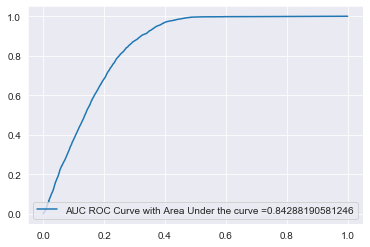

In [ ]:
generate_auc_roc_curve(DT, X_test)

In [ ]:
generate_model_report(y_test, y_pred_DT)

Accuracy =  0.7898380075644045
Precision =  0.736174914229226
Recall =  0.9034467994005566
F1 Score =  0.8112784363985902


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_depth = [40, 50,60,70,80]
grid = dict(n_estimators=n_estimators,max_depth=max_depth)

grid_search = GridSearchCV(estimator= RF_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.783623 using {'max_depth': 60, 'n_estimators': 10}


In [ ]:
RF = RandomForestClassifier(n_estimators = 10, max_depth = 60 )
RF.fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

In [ ]:
cm_RF = confusion_matrix(y_test, y_pred_RF) 
  
print ("Confusion Matrix : \n", cm_RF)

Confusion Matrix : 
 [[ 9478  4535]
 [ 1367 12646]]


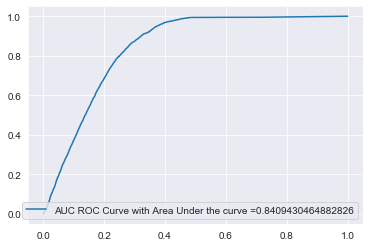

In [ ]:
generate_auc_roc_curve(RF, X_test)

In [ ]:
generate_model_report(y_test, y_pred_RF)

Accuracy =  0.7894098337258261
Precision =  0.7360456318025727
Recall =  0.9024477271105402
F1 Score =  0.8107969481310509


**Gradient Boosted Classifier**


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
max_depth = [3, 7, 9]
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators,max_depth=max_depth)

grid_search = GridSearchCV(estimator=GBC_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.797275 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [ ]:

GBC = GradientBoostingClassifier(learning_rate= 0.1,max_depth = 3,n_estimators = 100)

In [ ]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_GBC = GBC.predict(X_test)

In [ ]:
cm_GBC = confusion_matrix(y_test, y_pred_GBC) 
  
print ("Confusion Matrix : \n", cm_GBC)

Confusion Matrix : 
 [[ 9341  4672]
 [ 1115 12898]]


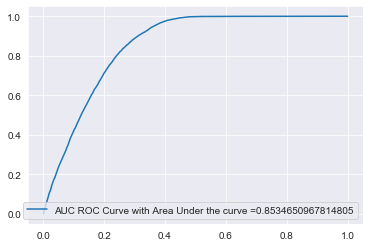

In [ ]:
generate_auc_roc_curve(GBC, X_test)

In [ ]:
generate_model_report(y_test,y_pred_GBC)

Accuracy =  0.7935131663455363
Precision =  0.734092202618099
Recall =  0.9204310283308357
F1 Score =  0.8167685147072792


**Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC
SVC_model = SVC()
C = [50, 10, 1.0, 0.1, 0.01]
grid = dict(C=C)

grid_search = GridSearchCV(estimator= SVC_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.785601 using {'C': 50}


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf',C = 50,probability = True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)


In [ ]:
cm_svc = confusion_matrix(y_test, y_pred_svc) 
  
print ("Confusion Matrix : \n", cm_svc)

In [ ]:
generate_auc_roc_curve(svc, X_test)

In [ ]:
generate_model_report(y_test,y_pred_svc)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB 
Bnb = BernoulliNB() 
Bnb.fit(X_train, y_train) 

BernoulliNB()

In [ ]:
y_pred_nb = Bnb.predict(X_test)

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb) 
  
print ("Confusion Matrix : \n", cm_nb)

Confusion Matrix : 
 [[ 8233  5780]
 [  334 13679]]


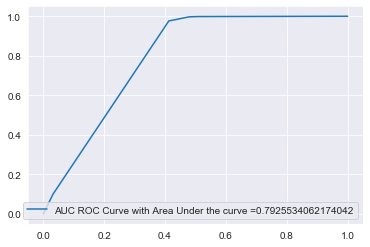

In [ ]:
generate_auc_roc_curve(Bnb, X_test)